<a href="https://colab.research.google.com/github/mkan1/ait-deep-learning/blob/main/assessment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [2]:
with open('/data/shakespeare_text.txt', 'r', encoding='utf-8') as f:
    shakespeare = f.read()
with open('/data/twain_text.txt', 'r', encoding='utf-8') as f:
    twain = f.read()


# run out of ram if dataset too big
shakespeare = shakespeare[0:30000]
twain = twain[0:30000]

## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

In [3]:
shakespeare_count = len(shakespeare)
twain_count = len(twain)

print(f"Shakespeare character count: {shakespeare_count}")
print(f"Twain character count: {twain_count}")

Shakespeare character count: 30000
Twain character count: 30000


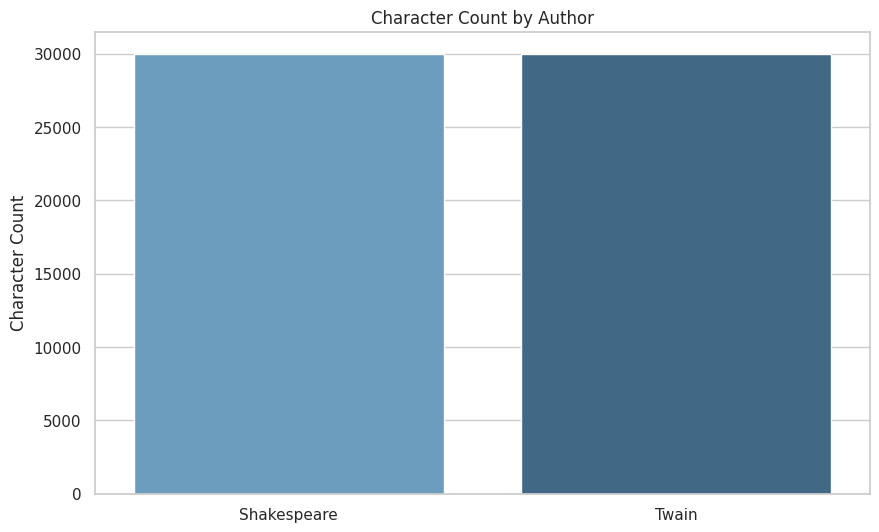

In [4]:
authors = ['Shakespeare', 'Twain']
character_counts = [shakespeare_count, twain_count]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=authors, y=character_counts, palette="Blues_d")
ax.set(ylabel='Character Count', title='Character Count by Author')
plt.show()

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [5]:
combined_text = shakespeare + twain
unique_chars = sorted(set(combined_text))
alphabet_length = len(unique_chars)
print(f"Alphabet length: {alphabet_length}")

char_to_index = dict((c, i) for i, c in enumerate(unique_chars))

Alphabet length: 84


In [6]:
sequence_length = 60

def generate_sequences(text, author_label):
    sequences = []
    labels = []
    for i in range(len(text) - sequence_length):
        sequence = text[i:i + sequence_length]
        encoded_sequence = [char_to_index[char] for char in sequence]
        one_hot_sequence = np.zeros((sequence_length, alphabet_length))
        for j, index in enumerate(encoded_sequence):
            one_hot_sequence[j, index] = 1
        sequences.append(one_hot_sequence)
        labels.append(author_label)
    return np.array(sequences), np.array(labels)

In [7]:
shakespeare_sequences, shakespeare_labels = generate_sequences(shakespeare, 0)
twain_sequences, twain_labels = generate_sequences(twain, 1)

data = np.concatenate((shakespeare_sequences, twain_sequences), axis=0)
labels = np.concatenate((shakespeare_labels, twain_labels), axis=0)

## Data splitting
Split the data into train, validate and test sets. Make 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [10]:
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [11]:
input_shape = (sequence_length, alphabet_length)
num_classes = 2

model = create_lstm_model(input_shape, num_classes)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training
Train the model and apply early stopping.

In [13]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

In [14]:
batch_size = 64
epochs = 50

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
599/599 [==============================] - 147s 235ms/step - loss: 0.2566 - accuracy: 0.8871 - val_loss: 0.1502 - val_accuracy: 0.9447
Epoch 2/50
599/599 [==============================] - 152s 254ms/step - loss: 0.1086 - accuracy: 0.9591 - val_loss: 0.0512 - val_accuracy: 0.9804
Epoch 3/50
599/599 [==============================] - 154s 256ms/step - loss: 0.0345 - accuracy: 0.9882 - val_loss: 0.0889 - val_accuracy: 0.9661
Epoch 4/50
599/599 [==============================] - 140s 234ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0070 - val_accuracy: 0.9981
Epoch 5/50
599/599 [==============================] - 142s 237ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 6/50
599/599 [==============================] - 151s 252ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0059 - val_accuracy: 0.9986
Epoch 7/50
599/599 [==============================] - 142s 236ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 5.7004e-

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy * 100:.2f}%")

375/375 [==============================] - 17s 46ms/step - loss: 0.0010 - accuracy: 0.9997
Test loss: 0.0010, Test accuracy: 99.97%


## Confusion matrix
Calculate and display the confusion matrix.

375/375 [==============================] - 19s 49ms/step


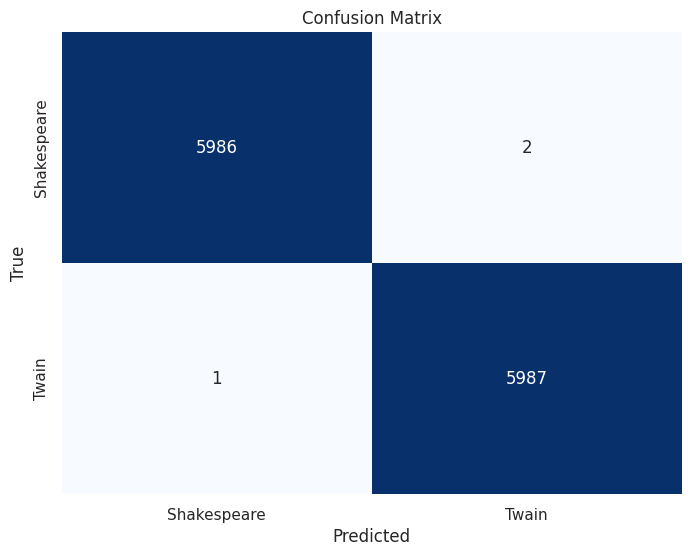

In [17]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Shakespeare', 'Twain'], yticklabels=['Shakespeare', 'Twain'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()